In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [3]:
#!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

### Load Data From CSV File


In [4]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RE_MEDICATION-Interaction-Cousera/train_ctrUa4K.csv')
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df_train.shape

(614, 13)

In [6]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RE_MEDICATION-Interaction-Cousera/test_lAUu6dG.csv')
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
df_test.shape

(367, 12)

In [8]:
train_original=df_train.copy()
test_original=df_test.copy()

In [9]:
train_original.shape

(614, 13)

In [10]:
test_original.shape

(367, 12)

In [11]:
df_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

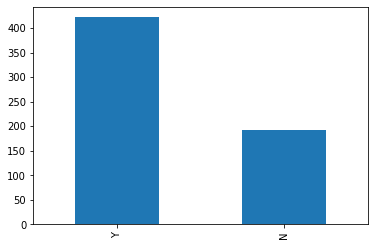

In [12]:
df_train['Loan_Status'].value_counts().plot.bar()

In [13]:
!conda install -c anaconda seaborn -y

/bin/bash: conda: command not found


In [14]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
df_train['Gender'].fillna(df_train['Gender'].mode()[0],inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0],inplace=True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0],inplace=True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0],inplace=True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0],inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0],inplace=True)

In [16]:
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mode()[0],inplace=True)

In [17]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [19]:
df_test['Gender'].fillna(df_test['Gender'].mode()[0],inplace=True)
#df_test['Married'].fillna(df_test['Married'].mode()[0],inplace=True)
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0],inplace=True)
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0],inplace=True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0],inplace=True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mode()[0],inplace=True)

In [20]:
df_test['LoanAmount'].fillna(df_test['LoanAmount'].mode()[0],inplace=True)

In [21]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [22]:
test_result=df_test.shape

In [23]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [24]:
X=df_train.drop('Loan_Status',1)
X


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [25]:
X.shape

(614, 12)

In [26]:
df_train.shape

(614, 13)

In [27]:
y=df_train.Loan_Status

In [28]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [29]:
df_train.shape

(614, 13)

In [30]:
#df_test=df_test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Loan_ID'],axis=1)

In [31]:
df_test=df_test.drop(['Loan_ID'],axis=1)

In [32]:
X=X.drop(['Loan_ID'],axis=1)

In [33]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [34]:
df_test.shape

(367, 11)

In [35]:

#df_train=pd.get_dummies(df_train)
df_test=pd.get_dummies(df_test)


In [36]:
df_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,4158,709,115.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,3250,1993,126.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,5000,2393,158.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


In [37]:
df_test.shape

(367, 20)

In [38]:
"""
X['Married'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True)
X.head()
"""

"\nX['Married'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True)\nX.head()\n"

In [39]:

X=pd.get_dummies(X)
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,120.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [40]:
X.shape

(614, 20)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [42]:





from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import seaborn as sns
grid_param={"criterion":['gini','entropy'],"splliter":['best','random'] ,'max_depth':range(1,15,1) ,"min_samples_leaf":range(1,15,1) ,"min_samples_split":range(2,25,1)  }

In [43]:
from sklearn.model_selection import train_test_split
x_tr,x_test,y_tr,y_test=train_test_split(X,y,random_state=1,test_size=0.3)
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
                                         
log=LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_log = GridSearchCV(estimator=log, param_grid = grid_values,scoring = 'accuracy',cv=10,n_jobs=-1)

grid_log.fit(x_tr,y_tr)                            

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [44]:
grid_log.best_params_

{'C': 25, 'penalty': 'l2'}

In [45]:

                                     
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
i=1
for train_index,test_index in kf.split(X,y):
  print('\n{} of  kfold{}'.format(i,kf.split))
  xtr,xvl=X.loc[train_index],X.loc[test_index]
  ytr,yvl=y.loc[train_index],y.loc[test_index]
 
  grid_log.fit(xtr,ytr)
  pred_test=grid_log.predict(xvl)
  score=accuracy_score(yvl,pred_test)
  cn=confusion_matrix(yvl,pred_test)
  cf=classification_report(yvl,pred_test)
  #SN=sns.heatmap(confusion_matrix(yvl,pred_test),annot=True)
  print('{} of accuracy_score={}= \n\n .confusion matrix{}=..\n\n{}'.format(i,score,cn,cf))
 

  i+=1  
  #print(sns.heatmap(confusion_matrix(yvl,pred_test),annot=True))
  pred_testLog=grid_log.predict(df_test)

 # score=accuracy_score(df_test,pred_test)
  #print('final-accuracy_score',score)
 



1 of  kfold<bound method StratifiedKFold.split of StratifiedKFold(n_splits=5, random_state=1, shuffle=True)>


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

1 of accuracy_score=0.6829268292682927= 

 .confusion matrix[[ 0 38]
 [ 1 84]]=..

              precision    recall  f1-score   support

           N       0.00      0.00      0.00        38
           Y       0.69      0.99      0.81        85

    accuracy                           0.68       123
   macro avg       0.34      0.49      0.41       123
weighted avg       0.48      0.68      0.56       123


2 of  kfold<bound method StratifiedKFold.split of StratifiedKFold(n_splits=5, random_state=1, shuffle=True)>


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

2 of accuracy_score=0.8373983739837398= 

 .confusion matrix[[18 20]
 [ 0 85]]=..

              precision    recall  f1-score   support

           N       1.00      0.47      0.64        38
           Y       0.81      1.00      0.89        85

    accuracy                           0.84       123
   macro avg       0.90      0.74      0.77       123
weighted avg       0.87      0.84      0.82       123


3 of  kfold<bound method StratifiedKFold.split of StratifiedKFold(n_splits=5, random_state=1, shuffle=True)>


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

3 of accuracy_score=0.7967479674796748= 

 .confusion matrix[[15 24]
 [ 1 83]]=..

              precision    recall  f1-score   support

           N       0.94      0.38      0.55        39
           Y       0.78      0.99      0.87        84

    accuracy                           0.80       123
   macro avg       0.86      0.69      0.71       123
weighted avg       0.83      0.80      0.77       123


4 of  kfold<bound method StratifiedKFold.split of StratifiedKFold(n_splits=5, random_state=1, shuffle=True)>


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

4 of accuracy_score=0.8048780487804879= 

 .confusion matrix[[19 20]
 [ 4 80]]=..

              precision    recall  f1-score   support

           N       0.83      0.49      0.61        39
           Y       0.80      0.95      0.87        84

    accuracy                           0.80       123
   macro avg       0.81      0.72      0.74       123
weighted avg       0.81      0.80      0.79       123


5 of  kfold<bound method StratifiedKFold.split of StratifiedKFold(n_splits=5, random_state=1, shuffle=True)>
5 of accuracy_score=0.8032786885245902= 

 .confusion matrix[[16 22]
 [ 2 82]]=..

              precision    recall  f1-score   support

           N       0.89      0.42      0.57        38
           Y       0.79      0.98      0.87        84

    accuracy                           0.80       122
   macro avg       0.84      0.70      0.72       122
weighted avg       0.82      0.80      0.78       122



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

In [46]:
from sklearn.model_selection import train_test_split
x_tr,x_test,y_tr,y_test=train_test_split(X,y,random_state=1,test_size=0.3)
                                         
                                         

In [47]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
dfc=DecisionTreeClassifier()

In [48]:
grid_params={"criterion":['gini','entropy'],"splliter":['best','random'] ,'max_depth':range(1,30,1) ,"min_samples_leaf":range(1,15,1) ,"min_samples_split":range(2,25,1)  }

In [49]:
rfc_param={"n_estimators":range(5,150,10),"max_features":['auto','sqrt'] ,'max_depth':range(2,50,1) ,"min_samples_leaf":range(2,15,1) ,"min_samples_split":range(2,25,1)  }

In [50]:
d_tree=GridSearchCV(estimator=dfc,param_grid=grid_params,cv=15,n_jobs=-2,scoring='accuracy')

In [51]:
d_tree.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__ccp_alpha', 'estimator__class_weight', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__min_impurity_decrease', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__random_state', 'estimator__splitter', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [52]:
d_tree=DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=5)
d_tree.fit(x_tr,y_tr)

DecisionTreeClassifier(criterion='entropy', max_depth=5, splitter='random')

In [53]:
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
i=1
for train_index,test_index in kf.split(X,y):
  print('\n{} of  kfold{}'.format(i,kf.split))
  xtr,xvl=X.loc[train_index],X.loc[test_index]
  ytr,yvl=y.loc[train_index],y.loc[test_index]

  d_tree=DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=5)

  d_tree.fit(xtr,ytr)
  pred_test=d_tree.predict(xvl)
  score=accuracy_score(yvl,pred_test)
  cn=confusion_matrix(yvl,pred_test)
  cf=classification_report(yvl,pred_test)
  print('{} of accuracy_score={}= \n\n .confusion matrix{}=..\n\n{}'.format(i,score,cn,cf))
 

  i+=1  
  #print(sns.heatmap(confusion_matrix(yvl,pred_test),annot=True))
  pred_testTree=d_tree.predict(df_test)


1 of  kfold<bound method StratifiedKFold.split of StratifiedKFold(n_splits=5, random_state=1, shuffle=True)>
1 of accuracy_score=0.8048780487804879= 

 .confusion matrix[[18 20]
 [ 4 81]]=..

              precision    recall  f1-score   support

           N       0.82      0.47      0.60        38
           Y       0.80      0.95      0.87        85

    accuracy                           0.80       123
   macro avg       0.81      0.71      0.74       123
weighted avg       0.81      0.80      0.79       123


2 of  kfold<bound method StratifiedKFold.split of StratifiedKFold(n_splits=5, random_state=1, shuffle=True)>
2 of accuracy_score=0.8211382113821138= 

 .confusion matrix[[16 22]
 [ 0 85]]=..

              precision    recall  f1-score   support

           N       1.00      0.42      0.59        38
           Y       0.79      1.00      0.89        85

    accuracy                           0.82       123
   macro avg       0.90      0.71      0.74       123
weighted avg   

In [54]:
cv_rfc=RandomizedSearchCV(estimator= rfc, scoring='accuracy',param_distributions= rfc_param,cv=15,n_jobs=-1,random_state=42)
cv_rfc.fit(x_tr,y_tr)
#cv_grid=GridSearchCV(estimator= dfc, param_grid= grid_param,cv=15,n_jobs=-1,scoring = 'accuracy')

RandomizedSearchCV(cv=15, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': range(2, 50),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': range(2, 15),
                                        'min_samples_split': range(2, 25),
                                        'n_estimators': range(5, 150, 10)},
                   random_state=42, scoring='accuracy')

In [55]:
cv_rfc.best_params_

{'n_estimators': 85,
 'min_samples_split': 13,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 15}

In [56]:
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
i=1
for train_index,test_index in kf.split(X,y):
  print('\n{} of  kfold{}'.format(i,kf.split))
  xtr,xvl=X.loc[train_index],X.loc[test_index]
  ytr,yvl=y.loc[train_index],y.loc[test_index]


  cv_rfc.fit(xtr,ytr)
  pred_test=cv_rfc.predict(xvl)
  score=accuracy_score(yvl,pred_test)
  cn=confusion_matrix(yvl,pred_test)
  cf=classification_report(yvl,pred_test)
  print('{} of accuracy_score={}= \n\n .confusion matrix{}=..\n\n{}'.format(i,score,cn,cf))
 

  i+=1  
  #print(sns.heatmap(confusion_matrix(yvl,pred_test),annot=True))
  pred_testrfc=cv_rfc.predict(df_test)


1 of  kfold<bound method StratifiedKFold.split of StratifiedKFold(n_splits=5, random_state=1, shuffle=True)>
1 of accuracy_score=0.8130081300813008= 

 .confusion matrix[[18 20]
 [ 3 82]]=..

              precision    recall  f1-score   support

           N       0.86      0.47      0.61        38
           Y       0.80      0.96      0.88        85

    accuracy                           0.81       123
   macro avg       0.83      0.72      0.74       123
weighted avg       0.82      0.81      0.79       123


2 of  kfold<bound method StratifiedKFold.split of StratifiedKFold(n_splits=5, random_state=1, shuffle=True)>
2 of accuracy_score=0.8373983739837398= 

 .confusion matrix[[18 20]
 [ 0 85]]=..

              precision    recall  f1-score   support

           N       1.00      0.47      0.64        38
           Y       0.81      1.00      0.89        85

    accuracy                           0.84       123
   macro avg       0.90      0.74      0.77       123
weighted avg   

In [57]:
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support as score# Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [59]:
folds = 5
param_comb = 5
xbg=XGBClassifier()
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
#cv=skf.split(x_tr,y_tr)

In [60]:
xgb_rfc=RandomizedSearchCV(estimator= xbg,scoring='accuracy', param_distributions= rfc_param,cv=15,n_jobs=-1,random_state=42)
xgb_rfc.fit(x_tr,y_tr)
#xbg_tree=GridSearchCV(estimator= xbg,scoring='accuracy', param_grid=grid_param,cv=15,n_jobs=-1)
#xbg_tree.fit(x_tr,y_tr)

RandomizedSearchCV(cv=15, estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': range(2, 50),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': range(2, 15),
                                        'min_samples_split': range(2, 25),
                                        'n_estimators': range(5, 150, 10)},
                   random_state=42, scoring='accuracy')

In [61]:
xgb_rfc.best_params_

{'n_estimators': 15,
 'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 8}

In [62]:
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
i=1
for train_index,test_index in kf.split(X,y):
  print('\n{} of  kfold{}'.format(i,kf.split))
  xtr,xvl=X.loc[train_index],X.loc[test_index]
  ytr,yvl=y.loc[train_index],y.loc[test_index]


  xgb_rfc.fit(xtr,ytr)
  pred_test=xgb_rfc.predict(xvl)
  score=accuracy_score(yvl,pred_test)
  cn=confusion_matrix(yvl,pred_test)
  cf=classification_report(yvl,pred_test)
  print('{} of accuracy_score={}= \n\n .confusion matrix{}=..\n\n{}'.format(i,score,cn,cf))
 

  i+=1  
  #print(sns.heatmap(confusion_matrix(yvl,pred_test),annot=True))
  pred_testxgb=xgb_rfc.predict(df_test)


1 of  kfold<bound method StratifiedKFold.split of StratifiedKFold(n_splits=5, random_state=1, shuffle=True)>
1 of accuracy_score=0.7886178861788617= 

 .confusion matrix[[18 20]
 [ 6 79]]=..

              precision    recall  f1-score   support

           N       0.75      0.47      0.58        38
           Y       0.80      0.93      0.86        85

    accuracy                           0.79       123
   macro avg       0.77      0.70      0.72       123
weighted avg       0.78      0.79      0.77       123


2 of  kfold<bound method StratifiedKFold.split of StratifiedKFold(n_splits=5, random_state=1, shuffle=True)>
2 of accuracy_score=0.8211382113821138= 

 .confusion matrix[[20 18]
 [ 4 81]]=..

              precision    recall  f1-score   support

           N       0.83      0.53      0.65        38
           Y       0.82      0.95      0.88        85

    accuracy                           0.82       123
   macro avg       0.83      0.74      0.76       123
weighted avg   

In [63]:
from sklearn.svm import SVC
x_tr,x_test,y_tr,y_test=train_test_split(X,y,random_state=1,test_size=0.3)

In [64]:
classifier_svm = SVC()
classifier_svm = SVC(kernel='rbf',C= 0.5, gamma=0.8)


In [65]:
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
i=1
for train_index,test_index in kf.split(X,y):
  print('\n{} of  kfold{}'.format(i,kf.split))
  xtr,xvl=X.loc[train_index],X.loc[test_index]
  ytr,yvl=y.loc[train_index],y.loc[test_index]


  classifier_svm.fit(xtr,ytr)
  pred_test=classifier_svm.predict(xvl)
  score=accuracy_score(yvl,pred_test)
  cn=confusion_matrix(yvl,pred_test)
  cf=classification_report(yvl,pred_test)
  print('{} of accuracy_score={}= \n\n .confusion matrix{}=..\n\n{}'.format(i,score,cn,cf))
 

  i+=1  
  #print(sns.heatmap(confusion_matrix(yvl,pred_test),annot=True))
  pred_testsvm=classifier_svm.predict(df_test)




1 of  kfold<bound method StratifiedKFold.split of StratifiedKFold(n_splits=5, random_state=1, shuffle=True)>
1 of accuracy_score=0.6910569105691057= 

 .confusion matrix[[ 0 38]
 [ 0 85]]=..

              precision    recall  f1-score   support

           N       0.00      0.00      0.00        38
           Y       0.69      1.00      0.82        85

    accuracy                           0.69       123
   macro avg       0.35      0.50      0.41       123
weighted avg       0.48      0.69      0.56       123


2 of  kfold<bound method StratifiedKFold.split of StratifiedKFold(n_splits=5, random_state=1, shuffle=True)>
2 of accuracy_score=0.6910569105691057= 

 .confusion matrix[[ 0 38]
 [ 0 85]]=..

              precision    recall  f1-score   support

           N       0.00      0.00      0.00        38
           Y       0.69      1.00      0.82        85

    accuracy                           0.69       123
   macro avg       0.35      0.50      0.41       123
weighted avg   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [66]:
sample_submission=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RE_MEDICATION-Interaction-Cousera/sample_submission_49d68Cx.csv')

In [67]:
sample_submission

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [68]:
sample_submission['Loan_ID']=test_original['Loan_ID']

Decision Tree  gives the best Accuracy-For Loan Predictions

In [69]:
sample_submission.Loan_Status=pred_testTree

In [70]:
sample_submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [71]:
pd.DataFrame(sample_submission,columns=['Loan_ID','Loan_Status']).to_csv('/content/drive/MyDrive/Colab Notebooks/RE_MEDICATION-Interaction-Cousera/sample_submission1.csv',index=False)

In [72]:
sample_submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
